### Class 3

Note:  The notes that follow are largely those of Mark Krumholz (ANU) who led the Bootcamp
last in 2015.  You can find the 2015 lectures [here](https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/python-15)

In [1]:
#imports

# These are to display images in-line
from IPython.display import Image
from IPython.core.display import HTML

#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



# Plotting: getting started

## Loading the pyplot module

Plotting two-dimensional figures in python is handled by the pyplot module, which is part of the matplotlib package. Any time you want to make plots, you need to import this package. You can simply import all the plotting commands into the current environment via

import matplotlib.pyplot as plt

The pyplot module contains a large number of routines for making different sorts of plots, some of which we will discuss today.

## Saving figures

It is always possible to save the contents of the current figure window to a file by doing

savefig('filename.ext')

where .ext is the extension that specifies the graphics format (e.g., .png, .pdf, .jpg, .ps). Matplotlib knows how to write most common graphics formats. It is also possible to specify the format manually using the format='...' keyword. The savefig command allows allows users to specify the resolution, size, and numerous other properties of the figure being written out. See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig for details.

# Line Plots

## The basics

We've already encountered the most common type of plot, a line plot, which is created by the command plot(...). Let's make some data to get started, and then try plotting it. We'll use the sinc function, defined by sinc(x) = sin(x) / x, as our example.

In [2]:
x = np.arange(-4*np.pi,4*np.pi,0.25)
sincx = np.sin(x)/x

To remind you, the way plot works is that you give it two arguments. The first is an array of x values, and the second is an array of y values. You should see something like this:

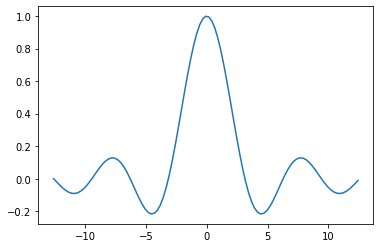

In [3]:
plt.plot(x, sincx)

We can control almost every aspect of how this plot appears using pyplot. First, we can alter the line itself. The plot command takes a third, optional argument which can be used to specify the color of the line and the plot symbol or line style. The syntax is plot(x, y, 'CS'), where the C is replaced by a letter specifying the color, and the S by a letter or two specifying the symbol. For example, suppose that we want to plot the data points as red circles rather than a blue line. The letter 'r' indicates red, and the letter 'o' indicates circles. We could do this via

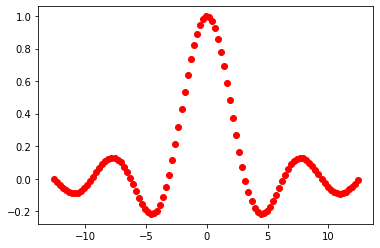

In [4]:
plt.plot(x, sincx, 'ro')

For the full list of pre-defined colors and line styles / data markers, see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot. Note that, if you don't manually specify colors, the default color will start with blue, and then will rotate through a pre-defined sequence of colors as more lines are added to the plot. It is also possible to control colors in much more detail, a topic we'll get to in a bit when we discuss images.

In addition to controlling the line style and color, one can control numerous other aspects of its appearance as well, via optional arguments passed to the plot command. I'll mention two of the most useful ones: linewidth and alpha. The linewidth keyword, or 'lw' for short, specifies the thickness of the line, in points. If a figure is going to be printed or projected, it is usually a good idea to increase its width to something larger than the default value of 1, which is a good choice for viewing on a computer screen but not for much else. The alpha keyword specifies that the line it to be made partially or fully transparent. An alpha value of 1 is an opaque line, and is the default, while a value of 0 is completely transparent (as in, you won't be able to see the line at all). Here's an example of using linewidth and transparency:

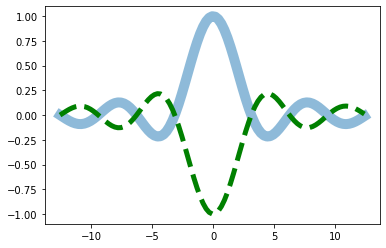

In [5]:
plt.plot(x, sincx, lw=10, alpha=0.5)
plt.plot(x, -sincx, 'g--', lw=5)


The set of plot options we have discussed only scratches the surface; as noted above, one really can control essentially every aspect of a plot's appearance using the optional arguments of the plot command. For a full list of options, see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot.

## Setting the axis range

In addition to changing the appearance of the plot line itself, we can also control the appearance of the axes in which it appears. This is done not in the plot command itself, but by making separate calls after the plot command has been executed. One basic operation is to control the ranges on the x and y axes. By default, pyplot will make reasonable choices about axis ranges based on the input data -- generally its approach is to choose to make the axis range equal to the smallest round number that is big enough to include all the input data. We can see this in the example we've just been working with. The input data have a minimum and a maximum of 4 pi in the x direction, and sinc(x) has a maximum of 1, so when we plotted sinc(x) and -sinc(x), we got a y axis range of -1 to 1, and an x axis range of -15 to 15.

However, we are free to override these defaults. For example, suppose that we want to expand the y axis a little so that the lines don't go all the way to the top and bottom of the plot, and we want to shrink the x axis so that the lines go all the way to the edge of the plot. We do this with the xlim and ylim commands as follows:

(-1.25, 1.25)

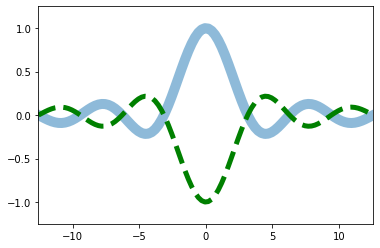

In [6]:
plt.plot(x, sincx, lw=10, alpha=0.5)
plt.plot(x, -sincx, 'g--', lw=5)

plt.xlim([-4*np.pi,4*np.pi])
plt.ylim([-1.25,1.25])

## Adding labels and titles

We can also add labels to the axes, and an overall title to the figure, using the xlabel, ylabel, and title commands:

Text(0.5, 1.0, 'The sinc function')

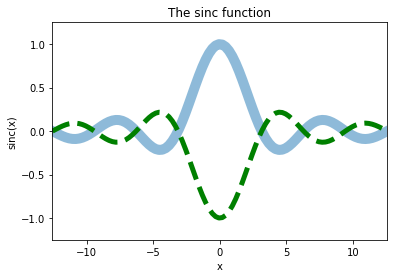

In [7]:
plt.plot(x, sincx, lw=10, alpha=0.5)
plt.plot(x, -sincx, 'g--', lw=5)

plt.xlim([-4*np.pi,4*np.pi])
plt.ylim([-1.25,1.25])

plt.xlabel('x')
plt.ylabel('sinc(x)')
plt.title('The sinc function')

Note: for those of you who know latex, all strings that are used in pyplot objects, including axis labels and titles, can be entered in latex format; just precede the string including the label with the letter r, then issue the appropriate latex command sequence, including leading and trailing $\$$ markers to delimit the math environment. For example, if we wanted my variable to the be the Greek letter chi instead of x, we could do xlabel(r'$\$$\chi $\$$') instead of xlabel('x').

It is also possible to control the positions and labeling of the tick marks on both axes, and to remove the tick marks or their labels entirely, but we won't get into that capability here. See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.tick_params for all the gory details.

## Annotation and legends

It is often useful to annotate plots with text, and pyplot provides a way to do this too. One can annotate a plot in many ways. One of the simplest is simply to add text at some desired location. This is accomplished via the text() command. The syntax is text(x, y, s), where x is the x coordinate at which the text should appear, y is the y coordinate, and s is a string specifying what text should appear. As always there are optional keywords (full listing at http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.text) that let you control things like the font, size, placement, etc. In the example below, we'll use the horizontalalignment keyword to specify that the text we're adding should be horizontally centered on the point we specify, rather than left-justified.

Text(0, 1.05, 'Maximum')

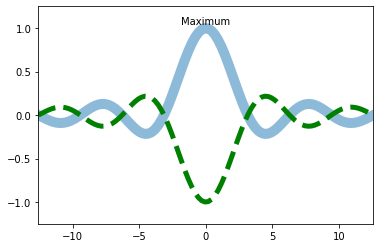

In [8]:
plt.plot(x, sincx, lw=10, alpha=0.5)
plt.plot(x, -sincx, 'g--', lw=5)

plt.xlim([-4*np.pi,4*np.pi])
plt.ylim([-1.25,1.25])

plt.text(0, 1.05, 'Maximum', horizontalalignment='center')

A second way to annotate a plot is by drawing an arrow connecting text and some feature to which you wish to call attention. This is accomplished via the annotate() command. The command syntax is annotate(s, (x,y), xytext=(xtext,ytext), arrowprops={...}). Here s is a string the specifies the text, (x,y) is the (x,y) position of the feature to be annotated, (xtext, ytext) is the (x,y) position at which the text should appear, and arrowprops is a dict describing the properties of the arrow. Here's an example:

Text(6, -0.75, 'first minimum')

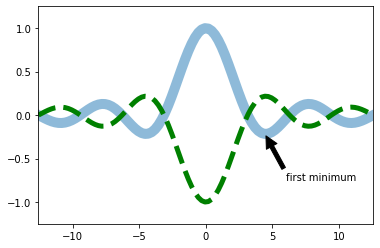

In [9]:
plt.plot(x, sincx, lw=10, alpha=0.5)
plt.plot(x, -sincx, 'g--', lw=5)

plt.xlim([-4*np.pi,4*np.pi])
plt.ylim([-1.25,1.25])

plt.annotate('first minimum', (x[68], sincx[68]), xytext=(6,-0.75), 
             arrowprops={'shrink' : 0.05, 'facecolor' : 'black'})

As usual, many more options are available: see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

A third way to annotate a plot is with a legend: a description of what each line represents. Legends are handled via the legend() command. The basic syntax is legend( ('first label', 'second label', ...) ), where the number of labels inside the inner parentheses matches the number of lines that have been plotted. These labels will be applied to the lines in the legend in an order that matches the order in which they were plotted. For example, this command

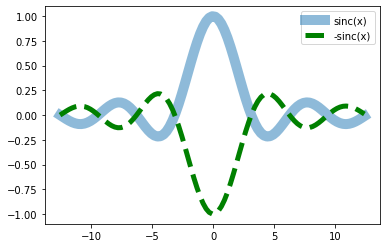

In [10]:
plt.plot(x, sincx, lw=10, alpha=0.5)
plt.plot(x, -sincx, 'g--', lw=5)
plt.legend( ('sinc(x)', '-sinc(x)') )

One can also control the placement of the legend, the fonts used in it, exactly which lines are included in the legend and in what order, and many other things. See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend for the full listing.

## Filled plots

One final trick we'll go over for line plots is filled line plots: plots where we fill the region between two lines rather than just plotting a single line. This is accomplished with the fill_between() command. The syntax is simple: fill_between(x, y1, y2=0). Here x and y1 are the normal x and y arrays given to a plotting command, and y2 gives the y coordinate for the second curve, which defines the area to be filled. By default it is 0, in which case the region filled is between the first curve and 0. For example, suppose we wanted to fill in the region between the sin and cos functions. We could do that as follows:



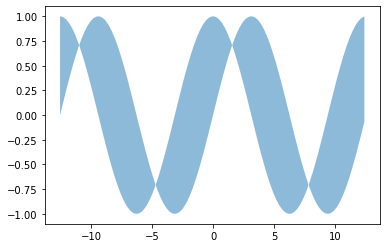

In [11]:
plt.fill_between(x, np.sin(x/2), np.cos(x/2), alpha=0.5)

We added the division by 2 to make the period 4 pi instead of 2 pi, which is a bit prettier. We also used alpha=0.5 to make the filled region semi-transparent.

# Plotting 2D Data

## Generating 2D data

Thus far we have dealt with 1D data: something that can be described as a function y(x). However, we also often have 2D data, which is represented as a function of two variables z(x,y). Matplotlib also provides mechanisms to visually represent data of this sort. To start with, let's make some 2D data that we can play with. Here's the first step:

In [12]:
x = np.arange(-2*np.pi,2*np.pi,0.01)
y = np.arange(-2*np.pi,2*np.pi,0.01)
xx, yy = np.meshgrid(x, y, indexing='ij')
print(x.shape)
print(xx.shape)

(1257,)
(1257, 1257)


The first two lines should look familiar: they just create two arrays, x and y, that go from -2 pi to 2 pi with a spacing of 0.01. The third line invokes a function you probably haven't seen before, called meshgrid, which is part of the numpy library. The meshgrid function does something very useful. In this case we've passed it two one-dimensional arrays, representing x and y coordinates. We can think of these two arrays as defining a 2D grid of points, with formed by combining all the possible x values with all the possible y values. The meshgrid function gives us back a pair of two-dimensional arrays, xx and yy, that represent the x and y coordinates of these mesh points. Specifically, xx[0,:] = x[0], xx[1,:] = x[1], xx[2,:] = x[2], ..., and similarly yy[:,0] = y[0], yy[:,1] = y[1], yy[:,2] = y[2], and so forth. The keyword indexing='ij' specifies that the x coordinate goes with the first dimension of the output arrays, and the y coordinate with the second. Finally, note that, though we've used it in 2D, the meshgrid command will work for an arbitrary number of dimensions.


Next, let's make some 2D functions from this data. The utility of meshgrid becomes clear as soon as we want to do this:

In [13]:
r = np.sqrt(xx**2 + yy**2)
phi = np.arccos(x/r)
z1 = np.sin(2*r) / r
z2 = z1 * (1 + 0.5*np.cos(4*phi))

The first two lines compute the r and phi coordinates in a polar coordinate system. The second two lines define two functions that we'll play with. The function z1 is just the sinc function in 2D, where we take sinc(r) instead of sinc(x). We've put a factor of 2 inside the sin to change the period from 2 pi to pi. The second function z2 just takes z1 and multiplies it by a factor that varies between 1.5 and 0.5 depending on the angle phi, with a period of pi/2 radians in the phi direction.

## Contour plots

How can we represent data like this? One simple way is through a contour plot. The archetypical contour plot is a topographic map: it shows curves of constant height, or more generally equal z value, as a function of (x,y) position. Matplotlib produces contour plots using the contour() command. Basic usage is simple: contour(xx, yy, z). The first two arguments are the x and y coordinates, and these can be either 1D arrays whose size matches the corresponding size of the z array, or 2D arrays whose shape matches that of the z array. Let's see what happens when we do this:

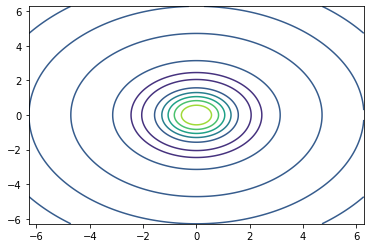

In [14]:
plt.contour(xx, yy, z1)

This is a contour plot of the data. One minor annoyance is that the spacing on the x and y axes isn't equal, so things look stretched. We can fix that by changing the aspect ratio of the axes. To do that, we use the commands

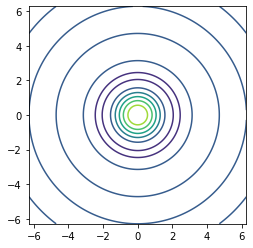

In [15]:
plt.contour(xx, yy, z1)
plt.gca().set_aspect('equal')

Let's break down these commands so we can understand what they're doing. First, gca() stands for get current axes. This function lets us grab the axes we're currently plotting to -- something that will become important when we get to multiple axes in a few minutes. Then the command set_aspect('equal'), as applied to these axes, tells pyplot that we want the aspect ratio of the plot to be such that the spacing of points on the axes is equal, even if that means not filling the whole plot window. 

For this to be more useful in a quantitative sense, it's helpful to have some control over the values at which contours are placed. Fortunately, this is easy to do with an optional additional argument to the contour function. After x, y, and z, one can pass in a fourth argument describing the contours. This can be either a single number, which just specifies how many contours to use, or an array giving the exact values to use for the contours. For example, for our sinc function we know that the maximum is 2.0, and the minimum is -0.43 (you can show this analytically, or just check by doing amax(z1) and amin(z1)), so we can choose contours to go from -0.4 to 1.0 in a spacing of 0.1.

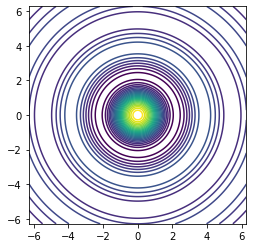

In [16]:
plt.contour(xx, yy, z1, np.arange(-0.4, 2.0, 0.1))
plt.gca().set_aspect('equal')

We can also label the contours using the clabel() command. Let's remake this plot using some labelled contours, placing the contours starting at -0.4 and going in intervals of 0.4.

<a list of 45 text.Text objects>

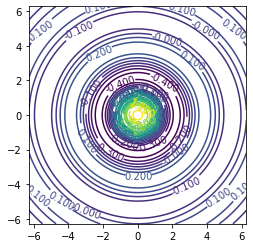

In [17]:
cs = plt.contour(xx, yy, z1, np.arange(-0.4, 2.0, 0.1))
plt.gca().set_aspect('equal')
plt.clabel(cs)

Note that, to add labels, we assign a variable to the output of the contour function, and then pass that variable to the clabel function. That way we can have multiple sets of contours at once, and label them separately, since each will be referred to by its own set of variables.

As usual, there are numerous options to control every aspect of the contours, including line styles and thicknesses, colors, label placement, font, etc. For details on contour, see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contour. For details on clabel, see  http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.clabel.

We can also make filled contours, which may be a little easier to view. Filled contours are made by the contourf() command, which acts almost exactly like contour. To make filled contours for our function z2, we can do

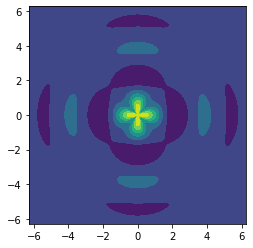

In [18]:
plt.contourf(xx, yy, z2, np.arange(-0.7, 3.21, 0.5))
plt.gca().set_aspect('equal')

Note that the contourf command doesn't draw contour lines, it just fills the space in between. If you want to label the contours, you can do that by calling contour after calling contourf. For example,

<a list of 18 text.Text objects>

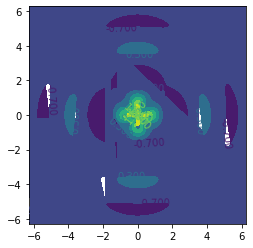

In [19]:
cs = plt.contourf(xx, yy, z2, np.arange(-0.7, 3.21, 0.5))
plt.gca().set_aspect('equal')
plt.clabel(cs)

## Raster, or "heatmap" plots

A second useful way of representing quantitative information is with raster plots, also sometimes called heatmap or colormap plots. In such a plot, we assign every z value to a color, so that the color at a given (x,y) position is determined by the value of z there. It's something like a filled contour plot, but with colors assigned continuously rather than in discrete blocks.

The pyplot tool for making raster plots is called imshow(), short for image-show. Basic usage is as follows:


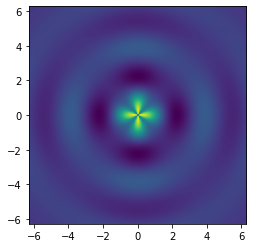

In [20]:
plt.imshow(z2, aspect='equal', origin='lower', extent=(-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi))

Notice that the syntax of imshow() is a little different than contour, and its operation is a bit different.

(1) For imshow, you don't give arrays of x and y values. This is for two reasons. First, imshow is often used as a way of displaying images, in which case there aren't really x and y coordinates, just pixels values. Second, for contour, you are allowed to have x and y points that aren't evenly spaced, whereas for imshow() you aren't. Thus you don't need to specify every x and y point, just the minimum and maximum.

(2) The mechanism for specifying the minimum and maximum is the extent keyword, which you set equal to a tuple of 4 numbers (xmin, xmax, ymin, ymax). If you don't specify the extent keyword, xmin and ymin are taken to be 0, and xmax and ymax to the number of elements in the data in the x and y directions.

(3) The aspect ratio can be set in the imshow command itself, as opposed to through modifying the axes. This is done via the keyword aspect. Setting it to equal forces equal spacing on the two axes.

(4) Finally, the origin keyword specifies where (0,0) is placed. This is another legacy of imshow also being used for image display. When displaying images, the normal convention is that pixel (0,0) is in the top left corner, (0,1) is right below it, (0,2) is right below that, etc. This is the default for imshow(). To display things as we normally plot data, where (0,0) is the origin, (0,1) is above it, etc., we specify origin='lower', which says to place the origin in the lower left rather than upper left corner.


This is useful, but even more useful is if we can add some information on what the colors mean. The tool for doing this is a color bar, which can be added via the colorbar() command:



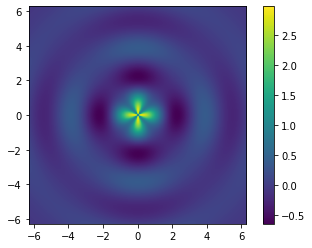

In [21]:
plt.imshow(z2, aspect='equal', origin='lower', extent=(-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi))
plt.colorbar()

It is also possible to control the color scale using the vmin and vmax keywords in the imshow command. These allow one to specify the minimum and maximum values for the color mapping by hand; by default the minimum used is the minimum of the input data, and the maximum is the maximum of the input data. Here's an example:

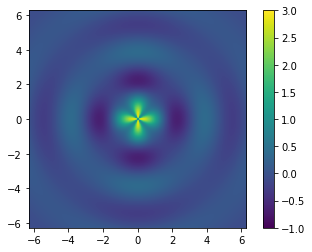

In [22]:
plt.imshow(z2, aspect='equal', origin='lower', extent=(-2*np.pi,2*np.pi,-2*np.pi,2*np.pi), vmin=-1, vmax=3)

plt.colorbar()

More information on imshow can be found at http://matplotlib.org/users/image_tutorial.html and http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow.



# Colors

## How computers think about color

Both contour and raster plots make use of color maps. A color map is exactly what the name implies: it's a recipe for mapping between numerical values and colors. The color bars we added to the raster plots are visual representations of color maps.

Like almost anything else, matplotlib makes it possible to control colors and color maps. Color maps are handled through the matplotlib.cm module. Before talking about how to use these color maps, it's worth pausing to explain a little how color perception works in the human eye, since the computer model of color is based on this. To start with, recall that color is just a way of describing wavelengths of light. There are an infinite number of possible colors, since a light source can combine an arbitrary number of wavelengths at arbitrary ratios of intensity. However, light detectors do not usually capture all this information. Instead, they generally involve some sort of filtering: they are sensitive to light over a certain range of wavelengths, and they measure the total amount of light received over the range in wavelengths to which they are sensitive.

The human eye is no different than any other light detector in this regard. The typical human eye is capable of perceiving three different colors: red, green, and blue. To be more precise, most human eyes have three types of color receptors that we can think of as filters that pick out a certain range of wavelengths. The longest-wavelength filter we call red, the middle one we call green, and the shortest-wavelength one we call blue. The most common computer model of color is based on this three-color system.

(Side note: the most common form of colorblindness, deuteranomaly, is caused by a mutation that has the effect of shifting the the green color receptor so that it is very close to the red one, preventing the affected individual from distinguishing red from green. The prevalence of this and other colorblindness mutations varies by region of origin, from a bit under 10% of the male population for those of Northern European descent, to about 5% for men of Asian and African ancestry. The prevalence rate among women is less than 1%, because colorblindness is a sex-linked trait. Conversely, a few percent of women, but almost no men, have a fourth color receptor, and so in principle can distinguish four colors rather than the usual three.)

The vast majority of modern computers describe color in terms of RGB values, where R = red, G = green, and B = blue. Each color is called a channel. We can think of RGB values as representing points in a three-dimensional space, with one dimension representing the red channel, one green, and one blue. Each of channel value is measured on a scale from 0 - 1, with 0 meaning no intensity of that color, and 1 maximum intensity. A value of (0, 0, 0) is pure black, and (1, 1, 1) is pure white; (1, 0, 0) is pure red, (0, 1, 0) is pure green, and (0, 0, 1) is pure blue. The red, green, and blue colors correspond roughly but not precisely to the three filters of human color perception.

## Colors and colormaps in matplotlib

When specifying colors in matplotlib, in addition to specifying letters that represent pre-defined colors, one can also specify colors directly by giving an RGB value. All the plotting commands for which one can specify a color take the keyword color, which can be assigned to a tuple of three numbers in the range 0-1. Thus, for example the command



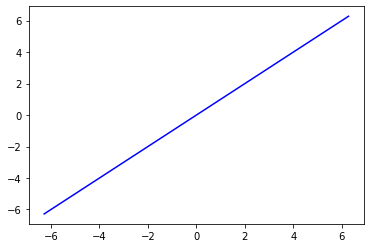

In [23]:
plt.plot(x, y, color=(0,0,1))

plots a line that is pure blue. Changing the color to (0, 0, 0.5) would make a darker shade of blue, halfway between blue and pure black.

There are an infinite number of values between 0 and 1, but of course In practice a screen or graphics card can only deal with finitely-many possible colors. The term color depth is used to describe how many bits are used to represent the values in between 0 and 1; the more bits are used, the more distinct colors can be described. Most modern computers / graphics cards use the TrueColor standard, in which 8 bits each are used for R, G, and B, for a total of 24 bits. This means that each channel can have 2**8 = 256 distinct values, for a total of 256**3 = 16,777,216 possible colors.

Now that we understand this, we can make sense of what a color map is: it is just a curve through this three-dimensional color-space. One end of the curve is assigned to the smallest value, one end is assigned to the largest value, and intermediate values represent points somewhere partway along the curve. A trivial example is the gray color map, in which the path is a straight line from (0, 0, 0) to (1, 1, 1). Along this path the R, G, and B values are always equal, so the result is shades of gray from pure black to pure white.

Matplotlib includes a set of predefined color maps, for which you can find illustrations at http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps. The imshow(), contour(), and contourf() functions all take the keyword cmap, which can be used to specify an alternate colormap. For example, to remake the raster plot of z2 using a different colormap, we could do



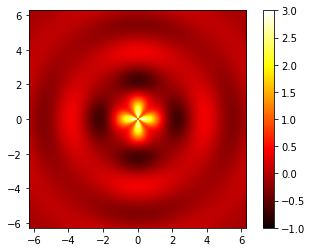

In [24]:
import matplotlib.cm as cm

plt.imshow(z2, aspect='equal', origin='lower', extent=(-2*np.pi,2*np.pi,-2*np.pi,2*np.pi), 
           vmin=-1, vmax=3, cmap=cm.hot)
plt.colorbar()

It is also possible to define one's own colormaps. See the instructions at http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps.

# Multiple Figures, and Multi-Panel Plots

## Terminology and concepts

Thus far we have been dealing with a single figure, containing a single set of axes. However, it is often desirable to work with multiple plots at once, either in separate figures, or inside a single figure. Matplotlib makes it possible for us to do this. To understand how this works, we need to start with some basic terminology and concepts. The highest level object that a user of pyplot usually deals with is a figure. One can think of a figure as representing a single plotting window, or, if we're writing output to files, a single file.

At the next level down, most things that we can plot inside a figure will go into axes. Axes are exactly what they sound like: a pair of x and y axes, which are characterized by having some range, as well as auxiliary data like tick marks, axis labels, titles, legends, etc. A figure can contain multiple axes, in which case multiple things will be drawn inside the same plotting window. Axes also contain information about their position within a figure. Figures and axes are both examples of graphics containers: they are things into which graphical elements can be placed.

At the next level down are things like lines, filled polygons (filled regions between lines, for example), text, etc. These are known as graphics primitives. Collectively, primitives and containers are known as Artists. They are the basic graphical elements out of which plots are built. Commands like plot, fill_between, etc., produce primitives and attach them to containers.

One figure and one axis are active at any given time. The active figure and axis are the ones into which the lines or other graphics primitives created by commands like plot will be placed. It is possible to place graphics in other figures and axes than the active one by manually specifying where they should go; the active set simply gives the default location.

## Figures and the figure command

The easiest case is working with multiple figures. These can be created using the figure() command.  We can also specify how big we want the figure window to be. For example, we can create a figureand have it be 7 inches wide by 5 inches high, by doing


In [25]:
plt.figure(figsize=(7,5))

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

To get the figure that is currently active, you can use the gcf() command (which stands for get current figure). The gcf() command actually returns an object called a Figure, which contains numerous pieces of information about the figure. For example, you can query a figure for its current width and height with fig.get_width() and fig.get_figheight().

One can also control other aspects of how figures behave. See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure.

## Multiple axes using subplot

What if we want to put multiple sets of axes within a single window? The easiest way to do this is using the subplot() command. The subplot command lets a user break the figure window it a set of equally-sized rows and columns, each of which will be filled with a set of axes containing whatever we choose to put in them. As an example, we can do

plt.subplot(3,2,1)

The first number in the subplot command, 3, says that we want 3 rows of axes. The second number, 2, says that we want 2 columns. The third number, 1, says that we want to create the axes that occupy the first of these 6 positions. (If the axes in this position already exist, new ones won't be created, and the command will just have the effect of making the axes in that slot the currently active ones.) Axes are numbered starting at the top left, then moving left to right and up to down.

Spacing between subplots can be adjusted via the subplots_adjust function.

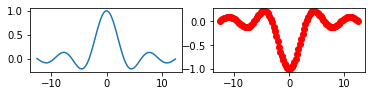

In [27]:
x = np.arange(-4*np.pi,4*np.pi,0.25)
sincx = np.sin(x)/x

plt.subplot(3,2,1)
plt.plot(x, sincx)

plt.subplot(3,2,2)
plt.plot(x, -sincx, 'ro')


## Manually managing axes

For more control, one can also places axes manually, at arbitrary locations. The command to add a set of axes is add_axes, which is attached to a particular figure object. This command takes as an argument a tuple of the form (left, bottom, width, height), where all these quantities are measured relative to the size of the current figure window, in units from 0 to 1 -- that is, the figure window is considered to be a set of axes going from 0 to 1 in the horizontal and vertical directions, and positions and distances are measured relative to that coordinate system.

Thus, for example:



In [ ]:
plt.subplot(3,2,1)
plt.plot(x, sincx)

plt.subplot(3,2,2)
plt.plot(x, -sincx, 'ro')

ax = plt.gcf().add_axes((0.125, 0.1, 0.775, 0.45))

plt.plot(x, sincx**2)

The command 

ax = plt.gcf().add_axes((0.125, 0.1, 0.775, 0.45))

says to create a new set of axes, with its lower left corner at (0.125, 0.1), and with a width of 0.775 and a height of 0.45. 

